Business Problem :

 A Retail store is required to analyze the day to day transactions and keep track of its customers spread across various location along with their purchases/returns across various categories.


 Create a report and display the below calculated merices, reports and interference. 

In [324]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [325]:
Cust_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Retail Case Study//Customer.csv')
Product_cat_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Retail Case Study//prod_cat_info.csv')                       
Transaction_df = pd.read_csv('C://Users//Om Computers//Desktop//Projects//Python for Analytics - Projects_//Python for Analytics - Projects_Parth//Retail Case Study//Transactions.csv')

1. Merge the datasets Customers, Product hirerachy and Transactions as Customer_Final.
    Ensure to keep all Customers who have doen transactions with us and select the join type accordingly

In [326]:
Cust_df.drop_duplicates(inplace= True)
Product_cat_df.drop_duplicates(inplace= True)
Transaction_df.drop_duplicates(inplace= True)

In [327]:
Cust_Transaction_df = pd.merge(left=Transaction_df, right= Cust_df, left_on='cust_id', right_on='customer_Id', how= 'left')

In [328]:
Product_cat_df['prod_cat_sub_code'] = Product_cat_df['prod_cat_code'].astype('str')+','+Product_cat_df['prod_sub_cat_code'].astype('str')

In [329]:
Product_cat_df['prod_cat_sub_code'].head(3)

0    1,4
1    1,1
2    1,3
Name: prod_cat_sub_code, dtype: object

In [330]:
Cust_Transaction_df.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [331]:
Cust_Transaction_df['prod_catsubcat'] = Cust_Transaction_df['prod_cat_code'].astype('str')+','+Cust_Transaction_df['prod_subcat_code'].astype('str')

In [332]:
Cust_Transaction_df['prod_catsubcat'].head(3)

0    1,1
1    3,5
2    5,6
Name: prod_catsubcat, dtype: object

In [333]:
Customer_Final = pd.merge(left=Cust_Transaction_df, right=Product_cat_df, left_on='prod_catsubcat', right_on='prod_cat_sub_code', how='left')

In [334]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23040 entries, 0 to 23039
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23040 non-null  int64  
 1   cust_id            23040 non-null  int64  
 2   tran_date          23040 non-null  object 
 3   prod_subcat_code   23040 non-null  int64  
 4   prod_cat_code_x    23040 non-null  int64  
 5   Qty                23040 non-null  int64  
 6   Rate               23040 non-null  int64  
 7   Tax                23040 non-null  float64
 8   total_amt          23040 non-null  float64
 9   Store_type         23040 non-null  object 
 10  customer_Id        23040 non-null  int64  
 11  DOB                23040 non-null  object 
 12  Gender             23031 non-null  object 
 13  city_code          23032 non-null  float64
 14  prod_catsubcat     23040 non-null  object 
 15  prod_cat_code_y    23040 non-null  int64  
 16  prod_cat           230

In [335]:
Customer_Final.drop(columns=['customer_Id','prod_cat_code_y','prod_catsubcat','prod_cat_sub_code','prod_sub_cat_code'],inplace=True)

In [336]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers


In [337]:
Customer_Final.rename(columns={'prod_cat_code_x':'prod_cat_code'}, inplace=True)

In [338]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [339]:
Customer_Final['tran_date'] = Customer_Final['tran_date'].str.replace('/','-')

In [340]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], dayfirst=True, errors='coerce')

In [341]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'],format='%d-%m-%y')

In [342]:
Customer_Final['DOB'] = Customer_Final['DOB'].str.replace('/','-')

In [343]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], dayfirst=True, errors='coerce')

In [344]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'],format='%d-%m-%y')

In [345]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
prod_cat                    object
prod_subcat                 object
dtype: object

In [346]:
Customer_Final[['transaction_id','cust_id','prod_subcat_code','prod_cat_code','city_code']] = Customer_Final[['transaction_id','cust_id','prod_subcat_code','prod_cat_code','city_code']].astype('object')

2. Prepare the summary report for the merged dataset
   (a) Get the Column name and their corresponding data types.
   (b) Top/Bottom 10 Observations.
   (c) "Five Number Summary" for continuous variables.(Min, Q1, Median, Q3, Max)
   (d) Frequency table for all the categorical Variables.

In [347]:
Customer_Final.dtypes

transaction_id              object
cust_id                     object
tran_date           datetime64[ns]
prod_subcat_code            object
prod_cat_code               object
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
DOB                 datetime64[ns]
Gender                      object
city_code                   object
prod_cat                    object
prod_subcat                 object
dtype: object

In [348]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances


In [349]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23030,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-08-10,M,8.0,Books,Non-Fiction
23031,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-10-12,M,4.0,Electronics,Mobiles
23032,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,DIY
23033,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,Bath
23034,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,Kids
23035,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23036,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23037,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23038,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23039,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


In [350]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [351]:
Customer_Final[['Qty','Rate','Tax','total_amt']].describe().round(2)

,Qty,Rate,Tax,total_amt
count,23040.00,23040.00,23040.00,23040.00
mean,2.44,637.09,248.68,2109.87
std,2.26,621.73,187.19,2505.61
min,-5.00,-1499.00,7.35,-8270.92
25%,1.00,312.00,98.28,762.45
50%,3.00,710.00,199.08,1756.95
75%,4.00,1109.00,365.77,3570.26
max,5.00,1500.00,787.50,8287.50


In [352]:
for column in Customer_Final.columns:
    if Customer_Final[column].dtypes == 'object':
        print(Customer_Final[column].value_counts())

transaction_id
32263938079    4
55389581056    3
25554803686    3
28679132905    3
14694035198    3
              ..
88791150012    1
17648795819    1
25673128667    1
14616200775    1
77960931771    1
Name: count, Length: 20878, dtype: int64
cust_id
268819    13
269449    13
275252    12
272415    12
270831    12
          ..
270876     1
272472     1
273867     1
274139     1
273723     1
Name: count, Length: 5506, dtype: int64
prod_subcat_code
4     4000
3     3065
10    2991
1     2948
11    2057
12    2027
7     1043
2     1007
6      989
9      985
8      970
5      958
Name: count, dtype: int64
prod_cat_code
5    6066
3    4895
6    4126
2    2996
1    2960
4    1997
Name: count, dtype: int64
Store_type
e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: count, dtype: int64
Gender
M    11804
F    11227
Name: count, dtype: int64
city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0   

3. Geerate histogram for all continuous variables and frequency bars for categorical variables.

In [353]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [354]:
Cat_df = Customer_Final[['Store_type','Gender','city_code','prod_cat','prod_subcat']]

In [355]:
Num_df = Customer_Final[['Qty','Rate','Tax','total_amt']]

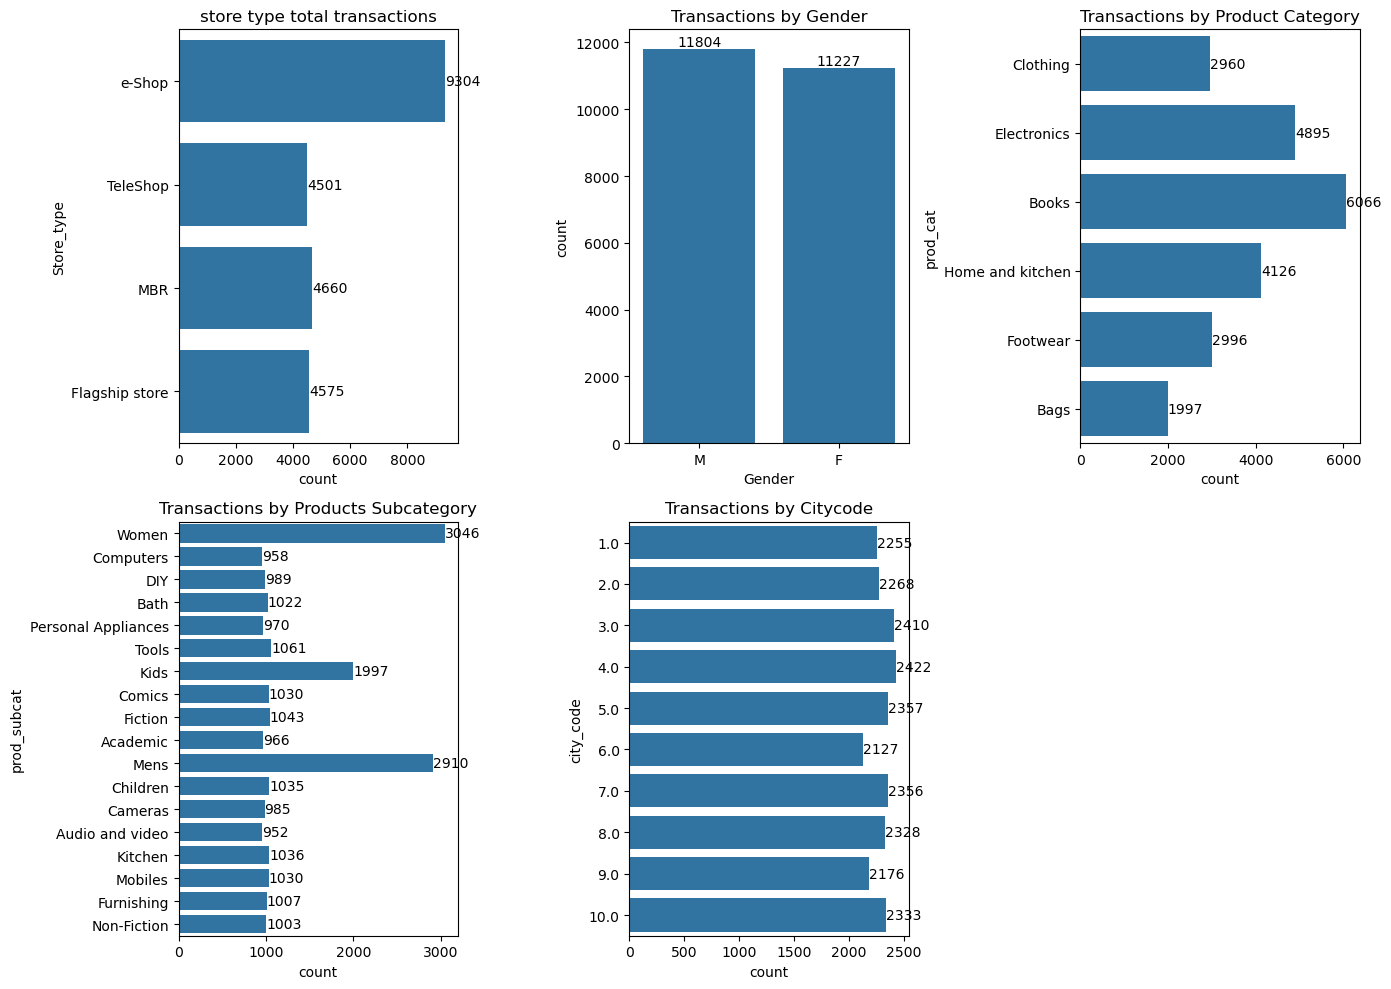

In [356]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10))
a=sns.countplot(y=Cat_df['Store_type'],ax= axes[0,0])
axes[0,0].set_title('store type total transactions')
for container in a.containers:
    a.bar_label(container)
b=sns.countplot(x=Cat_df['Gender'],ax=axes[0,1])
axes[0,1].set_title('Transactions by Gender')
for container in b.containers:
    b.bar_label(container)
c=sns.countplot(y=Cat_df['prod_cat'],ax=axes[0,2])
axes[0,2].set_title('Transactions by Product Category')
for container in c.containers:
    c.bar_label(container)
d=sns.countplot(y=Cat_df['prod_subcat'],ax = axes[1,0])
axes[1,0].set_title('Transactions by Products Subcategory')
for container in d.containers:
    d.bar_label(container)
e=sns.countplot(y=Cat_df['city_code'],ax= axes[1,1])
axes[1,1].set_title('Transactions by Citycode')
for container in e.containers:
    e.bar_label(container)
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

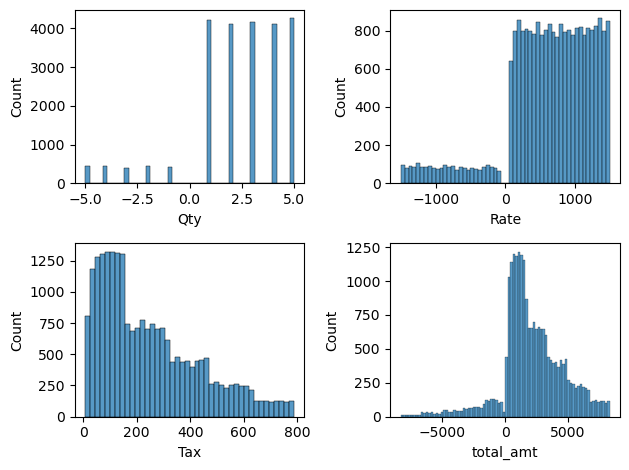

In [357]:
for i in range(Num_df.shape[1]):
    plt.subplot(2,2,i+1)
    sns.histplot(data=Num_df.iloc[:,i])
    
plt.tight_layout()
plt.show()

4. Calculate the following information using merged dataset.
   (i) Time period of the available transaction data
   (ii) Count of transactions where the total amount of transactions was negative

In [358]:
Customer_Final.columns


Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [359]:
Customer_Final['tran_date'].max()

Timestamp('2014-02-28 00:00:00')

In [360]:
Customer_Final['tran_date'].min()

Timestamp('2011-01-25 00:00:00')

In [361]:
from dateutil.relativedelta import relativedelta

In [362]:
Time_duration = relativedelta(Customer_Final['tran_date'].max(),Customer_Final['tran_date'].min())

In [363]:
Time_duration

relativedelta(years=+3, months=+1, days=+3)

In [364]:
print(f'Years:{Time_duration.years},Months:{Time_duration.months},days:{Time_duration.days}')

Years:3,Months:1,days:3


In [365]:
Customer_Final['total_amt'][Customer_Final['total_amt']<0].count()

2164

5. Analyze which product categories are more popular among female vs male

In [366]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [367]:
Qty_sold = Customer_Final.pivot_table(index='prod_cat', columns='Gender', values='transaction_id', aggfunc={'transaction_id':'count'})

In [368]:
Qty_sold

Gender,F,M
prod_cat,,
Bags,993,1004
Books,2946,3116
Clothing,1439,1518
Electronics,2328,2567
Footwear,1528,1467
Home and kitchen,1993,2132


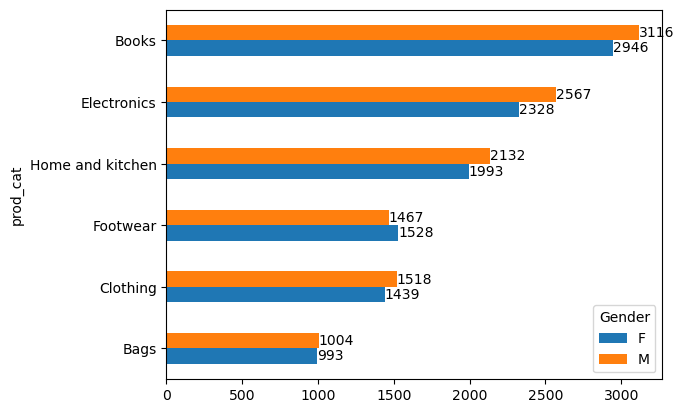

In [369]:
a= Qty_sold.sort_values(by=['F','M'], ascending=True).plot(kind='barh')
for i in a.containers:
    a.bar_label(i)
plt.show()

6. Which city code has the maximum customers and what was the % of customers from that city.

In [370]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [371]:
City_wise = Customer_Final.groupby(by=['city_code']).agg(Customers = ('cust_id','nunique'))

In [372]:
City_wise

,Customers
city_code,
1.0,535
2.0,546
3.0,576
4.0,569
5.0,570
6.0,516
7.0,563
8.0,551
9.0,532


In [373]:
City_wise['percent'] = City_wise['Customers'].div(City_wise['Customers'].sum()*100)

In [374]:
City_wise

,Customers,percent
city_code,,
1.0,535,0.000972
2.0,546,0.000992
3.0,576,0.001047
4.0,569,0.001034
5.0,570,0.001036
6.0,516,0.000937
7.0,563,0.001023
8.0,551,0.001001
9.0,532,0.000967


In [375]:
City_wise.value_counts()

Customers  percent 
546        0.000992    2
516        0.000937    1
532        0.000967    1
535        0.000972    1
551        0.001001    1
563        0.001023    1
569        0.001034    1
570        0.001036    1
576        0.001047    1
Name: count, dtype: int64

In [376]:
City_wise['Customers'].max()

576

In [377]:
City_wise['Customers'].idxmax()

3.0

In [378]:
(City_wise.max()/City_wise.sum()*100).round(2)

Customers    10.47
percent      10.47
dtype: float64

In [379]:
City_wise.sort_values(by=['Customers'], ascending= False)

,Customers,percent
city_code,,
3.0,576,0.001047
5.0,570,0.001036
4.0,569,0.001034
7.0,563,0.001023
8.0,551,0.001001
2.0,546,0.000992
10.0,546,0.000992
1.0,535,0.000972
9.0,532,0.000967


7. Which store type sells the max. products by values and by quatity.

In [380]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [381]:
Storetype_df = Customer_Final.groupby(by=['Store_type']).agg(Total_Amount = ('total_amt',np.sum), Total_Qty = ('Qty',np.sum))

In [382]:
Storetype_df

,Total_Amount,Total_Qty
Store_type,,
Flagship store,9.721597e+06,11142
MBR,9.674941e+06,11195
TeleShop,9.372134e+06,10993
e-Shop,1.984262e+07,22790


In [383]:
Storetype_df.sort_values(by=['Total_Amount','Total_Qty'], ascending= False)

,Total_Amount,Total_Qty
Store_type,,
e-Shop,1.984262e+07,22790
Flagship store,9.721597e+06,11142
MBR,9.674941e+06,11195
TeleShop,9.372134e+06,10993


8. What was the total amount earned from the "Electronics" and "Clothing" from flgship stores.

In [384]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [385]:
Flagship_df = Customer_Final.loc[(Customer_Final['Store_type'] == 'Flagship store') & (Customer_Final['prod_cat'].isin(['Electronics','Clothing'])),['Store_type','prod_cat','total_amt']]

In [386]:
Flagship_df['total_amt'].sum()

3409559.27

9. What was the total amount earned from male under "Electronics" category.

In [387]:
Male_electronic_amt = Customer_Final.loc[(Customer_Final['Gender'] == 'M') & (Customer_Final['prod_cat'] == 'Electronics'), ['total_amt']].sum()

In [388]:
Male_electronic_amt

total_amt    5711351.62
dtype: float64

10. How many Customers have more than 10 unique transactions, after removing all negative transactions.

In [389]:
Customer_df = Customer_Final.loc[(Customer_Final['total_amt']>0),['cust_id','total_amt','transaction_id']]

In [390]:
Tran_df = Customer_df.groupby(by='cust_id').agg(Cnt_positive_tran = ('transaction_id','nunique'))

In [391]:
Tran_df[Tran_df.values>10]

,Cnt_positive_tran
cust_id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


11. For all Customers aged between 25 - 35
    (i) Total amount spend for electronics and books.
    (ii) Total amount spend between 1st January 2014 to 1st March 2014.

In [392]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [393]:
Customer_Final['age'] = round((Customer_Final['tran_date'] - Customer_Final['DOB']).dt.days/365.25,2)

In [396]:
Total_amt_df = Customer_Final.loc[(Customer_Final['prod_cat'].isin(['Electronics','Books'])) & (Customer_Final['age']>=25) & (Customer_Final['age']<=35), ['total_amt','prod_cat','age']]

In [401]:
Customer_Final['total_amt'].sum()

48611294.81

In [399]:
Spend_q4 = Customer_Final.loc[(Customer_Final['age'].between(25,35)) & (Customer_Final['tran_date'].between('2014-01-01','2014-03-01')),['total_amt']]

In [400]:
Spend_q4.values.sum()

995938.71